In [1]:
def runge(x):
    return 1/(1+(25*(x**2)))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# 生成訓練數據
x_train = np.linspace(-1, 1, 100).reshape(-1, 1)
y_train = runge(x_train)
# 神經網路結構
input_size = 1
hidden1_size = 10
hidden2_size = 100
hidden3_size = 10
output_size = 1

# 隨機初始化權重
np.random.seed(4)
W1 = np.random.randn(input_size, hidden1_size)
b1 = np.zeros((1, hidden1_size))
W2 = np.random.randn(hidden1_size, hidden2_size)
b2 = np.zeros((1, hidden2_size))
W3 = np.random.randn(hidden2_size, hidden3_size)
b3 = np.zeros((1, hidden3_size))
W4 = np.random.randn(hidden3_size, output_size)
b4 = np.zeros((1, output_size))

# 學習率
lr = 0.1

In [3]:
def sig(x):
    return 1/(1+np.exp(-x))

def sig_deriv(x):
    s = sig(x)
    return s*(1-s)

In [4]:
losses = []
for epoch in range(5000):
    # 前向傳播
    z1 = x_train @ W1 + b1
    a1 = sig(z1)
    z2 = a1 @ W2 + b2
    a2 = sig(z2)
    z3 = a2 @ W3 + b3
    a3 = sig(z3)
    y_pred = a3 @ W4 + b4  # 輸出層線性

    # 損失
    loss = np.mean((y_train - y_pred)**2)
    losses.append(loss)
    # 反向傳播
    dloss = 2 * (y_pred - y_train) / y_train.shape[0]

    # Layer 4
    dW4 = a3.T @ dloss
    db4 = np.sum(dloss, axis=0, keepdims=True)
    da3 = dloss @ W4.T

    # Layer 3
    dz3 = da3 * sig_deriv(z3)
    dW3 = a2.T @ dz3
    db3 = np.sum(dz3, axis=0, keepdims=True)
    da2 = dz3 @ W3.T

    # Layer 2
    dz2 = da2 * sig_deriv(z2)
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)
    da1 = dz2 @ W2.T

    # Layer 1
    dz1 = da1 * sig_deriv(z1)
    dW1 = x_train.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # 更新權重
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    W3 -= lr * dW3
    b3 -= lr * db3
    W4 -= lr * dW4
    b4 -= lr * db4
print('MSE: ',loss)


MSE:  0.00029031547391471837


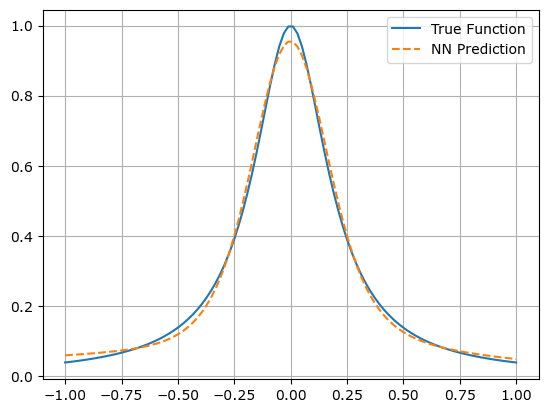

In [5]:
x_test = np.linspace(-1, 1, 100).reshape(-1,1)
z1_test = x_test @ W1 + b1
a1_test = sig(z1_test)
z2_test = a1_test @ W2 + b2
a2_test = sig(z2_test)
z3_test = a2_test @ W3 + b3
a3_test = sig(z3_test)
y_test = a3_test @ W4 + b4

plt.plot(x_test, runge(x_test), label="True Function")
plt.plot(x_test, y_test, '--', label="NN Prediction")
plt.legend()
plt.grid(True)
plt.show()

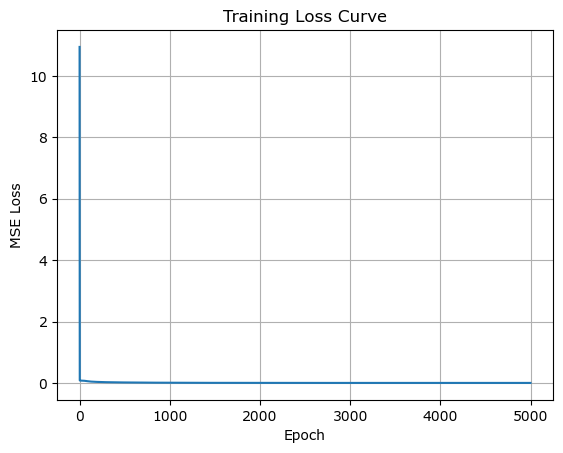

In [6]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()